In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('star_dataset.csv')

In [3]:
df[df['Distance (ly)'] == df['Distance (ly)'].min()]
feat = df[['Distance (ly)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Temperature (K)']].copy()
print("Distance range: ", feat['Distance (ly)'].min(), "-", feat['Distance (ly)'].max())
print("Luminosity range:", feat['Luminosity (L/Lo)'].min(), "-", feat['Luminosity (L/Lo)'].max())
print("Radius range:", feat['Radius (R/Ro)'].min(), "-", feat['Radius (R/Ro)'].max())
print("Temperature range:", feat['Temperature (K)'].min(), "-", feat['Temperature (K)'].max())

Distance range:  3.8777984948209214 - 2600.4907228269035
Luminosity range: -4.99314130236977 - 196004.85408062232
Radius range: 0.068086676942714 - 887.0979364514885
Temperature range: 2750.18316322717 - 28044.279271635794


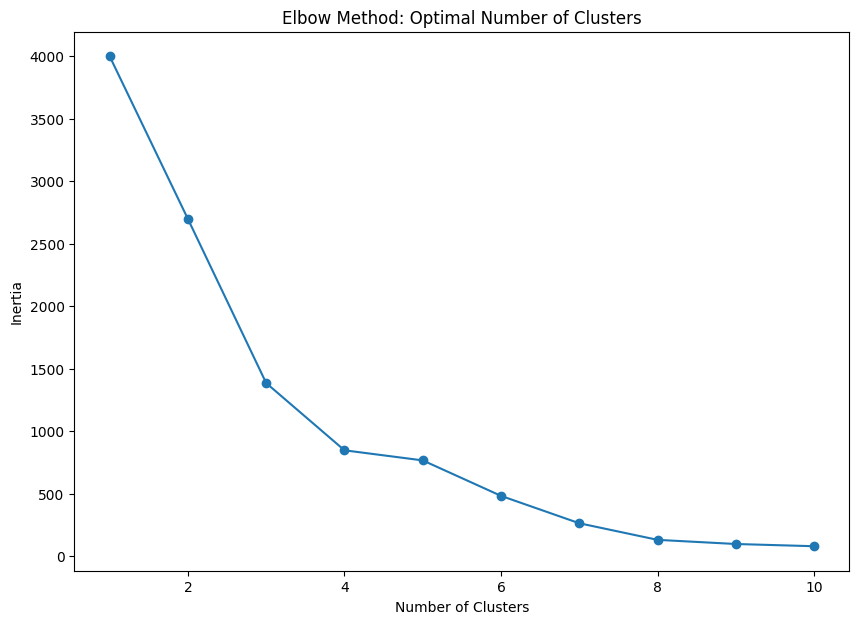

In [4]:
#### 1. k-means clustering according to characteristics of stars
df = pd.read_csv('star_dataset.csv')
df = pd.get_dummies(df, columns=['Spectral Class'])
## problems with depicting negative ralive values on the log scale
# found solution: use shifting approach, to make all the values positive but also shift all the other values accordingly
min_luminosity = feat['Luminosity (L/Lo)'].min()
feat['Luminosity (L/Lo) Shifted'] = feat['Luminosity (L/Lo)'] - min_luminosity + 1
feat = feat.drop(columns=['Luminosity (L/Lo)'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feat)
# find an appropriate ammount of clusters(elbow method)
inertia = []
cluster_range = range(1,11)
for n in cluster_range:
    kmeans = KMeans(n_clusters=n, random_state=23)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.show()
# As a result, it’s clear that 4 clusters produce the most significant reduction in inertia.

<Axes: xlabel='Temperature (K)', ylabel='Luminosity (L/Lo) Shifted'>

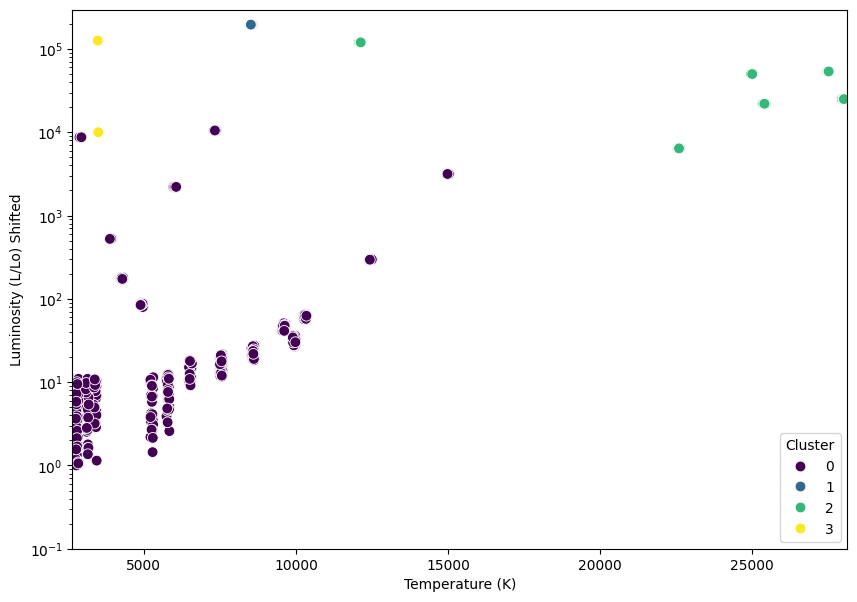

In [5]:
# I took first 3 clusters, because in case of 4 clusters the last cluster seem to have like one observation
# what doesn't really make sense to me, I also see, that 3 clusters bring the most of impact 
kmeans = KMeans(n_clusters=4, random_state=45)
feat['Cluster'] = kmeans.fit_predict(scaled_features)
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlim([feat['Temperature (K)'].min()-100, feat['Temperature (K)'].max()+100])
plt.ylim([0.1, feat['Luminosity (L/Lo) Shifted'].max()+100000])
sns.scatterplot(
    x = feat['Temperature (K)'],
    y = feat['Luminosity (L/Lo) Shifted'],
    hue = feat['Cluster'],
    palette = 'viridis',
    s = 60
)

In [6]:
# Composing dataframe with clusters and name for power bi
df = pd.read_csv('star_dataset.csv')
df_with_clusters = df.join(feat['Cluster'])
df_with_clusters.dtypes
# Ensure numeric format and convert to integers after rounding
df_with_clusters['Distance (ly)'] = pd.to_numeric(df_with_clusters['Distance (ly)'], errors='coerce').round().astype('Int64')
df_with_clusters['Luminosity (L/Lo)'] = pd.to_numeric(df_with_clusters['Luminosity (L/Lo)'], errors='coerce').round().astype('Int64')
df_with_clusters['Radius (R/Ro)'] = pd.to_numeric(df_with_clusters['Radius (R/Ro)'], errors='coerce').round().astype('Int64')
df_with_clusters['Temperature (K)'] = pd.to_numeric(df_with_clusters['Temperature (K)'], errors='coerce').round().astype('Int64')
# Fill NaN values with a default integer, e.g., 0, if any remain after conversion
df_with_clusters['Distance (ly)'].fillna(0, inplace=True)
df_with_clusters['Luminosity (L/Lo)'].fillna(0, inplace=True)
df_with_clusters['Radius (R/Ro)'].fillna(0, inplace=True)
df_with_clusters['Temperature (K)'].fillna(0, inplace=True)
df_with_clusters.to_csv('stars_clusters.csv',index='False', sep=';')

C:\Users\Romercor\AppData\Local\Temp\ipykernel_11108\1413956588.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_clusters['Distance (ly)'].fillna(0, inplace=True)
C:\Users\Romercor\AppData\Local\Temp\ipykernel_11108\1413956588.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

<Axes: xlabel='Radius (R/Ro)', ylabel='Luminosity (L/Lo) Shifted'>

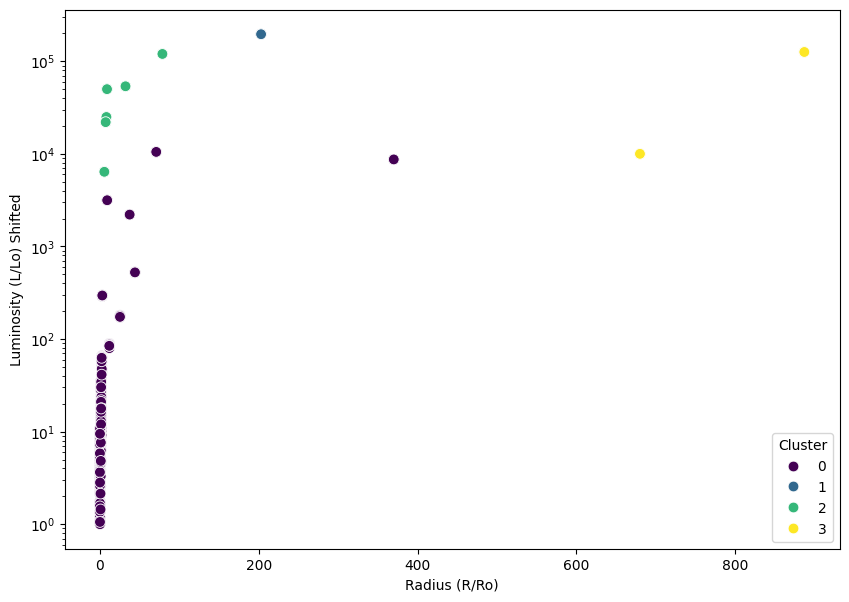

In [7]:
plt.figure(figsize=(10,7))
plt.yscale('log')
sns.scatterplot(
    x = feat['Radius (R/Ro)'],
    y = feat['Luminosity (L/Lo) Shifted'],
    hue = feat['Cluster'],
    palette = 'viridis',
    s = 60
)

<Axes: xlabel='Distance (ly)', ylabel='Luminosity (L/Lo) Shifted'>

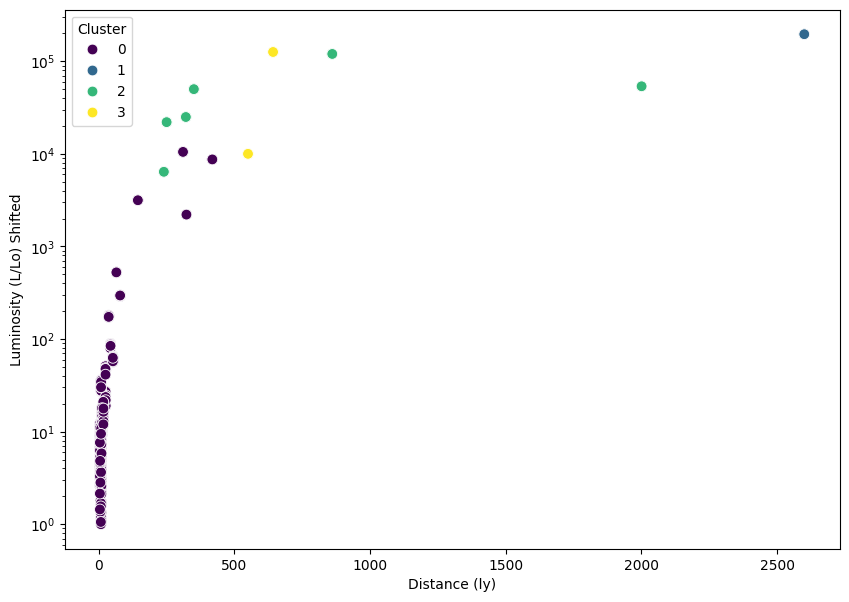

In [8]:
plt.figure(figsize=(10,7))
plt.yscale('log')
sns.scatterplot(
    x = feat['Distance (ly)'],
    y = feat['Luminosity (L/Lo) Shifted'],
    hue = feat['Cluster'],
    palette = 'viridis',
    s = 60
)

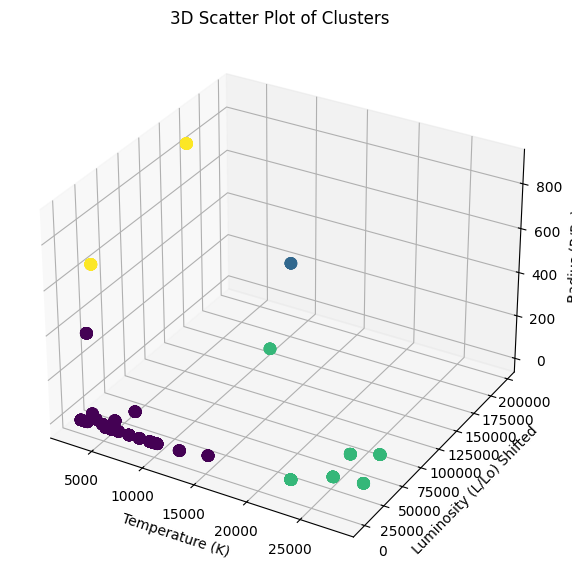

In [9]:
### trying to create a 3d plot for clustering 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    feat['Temperature (K)'], 
    feat['Luminosity (L/Lo) Shifted'], 
    feat['Radius (R/Ro)'], 
    c=feat['Cluster'], 
    cmap='viridis', 
    s=60
)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Luminosity (L/Lo) Shifted')
ax.set_zlabel('Radius (R/Ro)')
plt.title("3D Scatter Plot of Clusters")
plt.show()

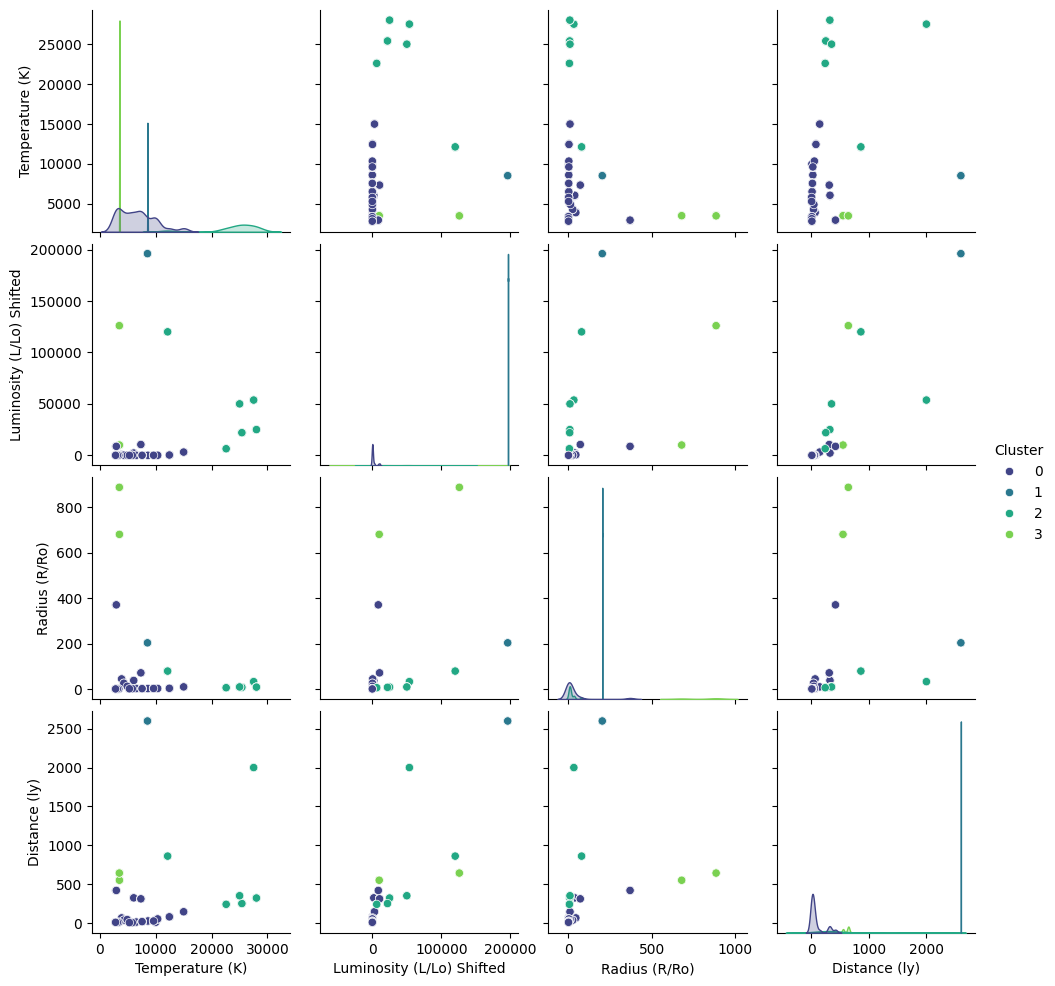

In [10]:
### didn't really help with 3d visualisation, so I will try just to compare them in pairs
import seaborn as sns
pair_data = feat[['Temperature (K)', 'Luminosity (L/Lo) Shifted', 'Radius (R/Ro)', 'Distance (ly)', 'Cluster']]
pair_data['Cluster'] = pair_data['Cluster'].astype('category')
sns.pairplot(pair_data, hue='Cluster', palette='viridis')
plt.show()

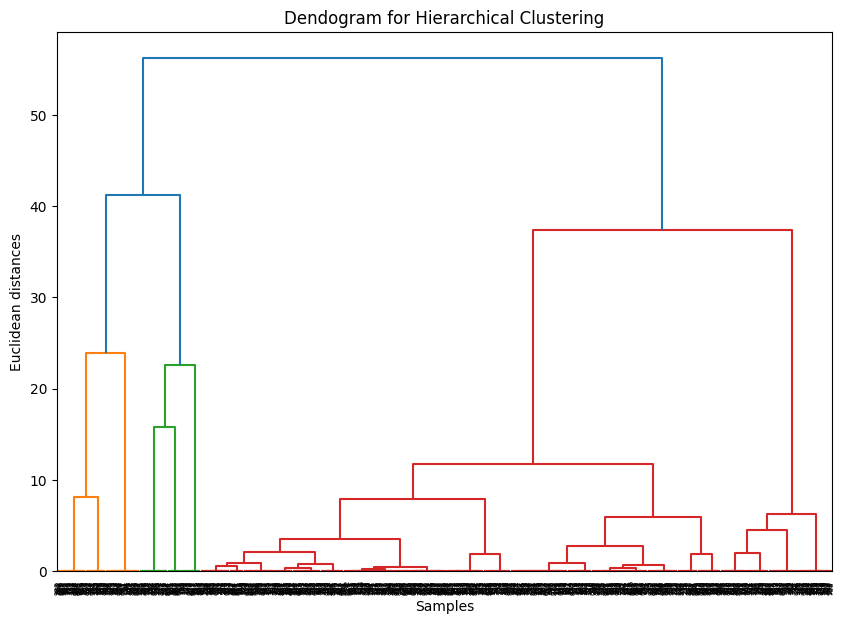

In [11]:
 #I want to compare k-means with hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()
# the same ammount of clusters like in k-means according to dendogram(no difference?)

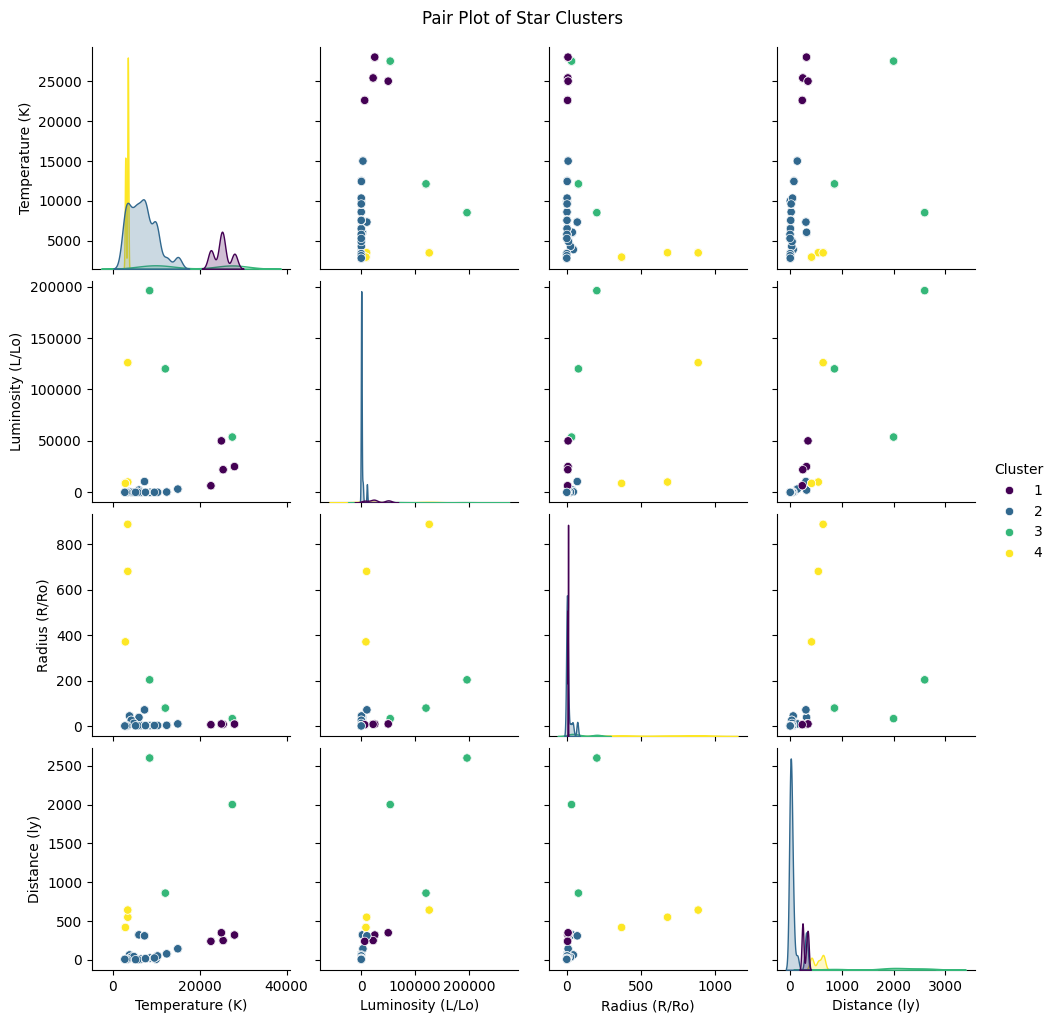

In [12]:
#building scatter plots pair to explore the difference from k-means
cluster_labels = fcluster(linked, 4, criterion='maxclust')
df_with_clusters_h = df
df_with_clusters_h['Cluster'] = cluster_labels
df_with_clusters_h
features = df[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)','Distance (ly)','Cluster' ]]
features.loc[:, 'Cluster'] = features['Cluster'].astype('category')
sns.pairplot(features, hue='Cluster', palette='viridis', markers="o")
plt.suptitle('Pair Plot of Star Clusters', y=1.02)  # Adjust title positioning
plt.show()
# in genaral, i don't see much difference, but I actually like this clustering more
# because of clearer division in more sample pairs than in k-means
# There are a good correlation in multiple pairs, however, according to my personal research distance shouldn't affect any of other variables
# what is not the case on this pair plots, maybe the problem is in a sample themselve, but I decided to choose the most common and insightful pair
# temperature - luminosity particularly
# there are also another pair we could analyse, but because spectral class is mostly based on these two characteristics I decided to use it as well

In [13]:
# cleaning data set - breaking down spectral class into single parts
df_with_clusters_h
df_with_clusters_h['Spectral_Type'] = df_with_clusters_h['Spectral Class'].str.extract(r'([A-Z])')
df_with_clusters_h['Sub_Type'] = df_with_clusters_h['Spectral Class'].str.extract(r'(\d+\.?\d?)')
df_with_clusters_h['Luminosity_Class'] = df_with_clusters_h['Spectral Class'].str.extract(r'\d+\.?\d?([A-Za-z\-]+)$')
df_with_clusters_h['Sub_Type'] = pd.to_numeric(df_with_clusters_h['Sub_Type'], errors='coerce')
print(df_with_clusters_h[['Spectral Class', 'Spectral_Type', 'Sub_Type', 'Luminosity_Class']])

    Spectral Class Spectral_Type  Sub_Type Luminosity_Class
0              A7V             A       7.0                V
1             A2Ia             A       2.0               Ia
2             M4Ve             M       4.0               Ve
3             F7Ib             F       7.0               Ib
4             M4Ve             M       4.0               Ve
..             ...           ...       ...              ...
995            M6V             M       6.0                V
996          B1III             B       1.0              III
997          B2III             B       2.0              III
998            K1V             K       1.0                V
999            M6V             M       6.0                V

[1000 rows x 4 columns]


In [14]:
# presenting the result of last step
unique_spectral_classes = df_with_clusters_h.groupby('Spectral Class').first()
unique_spectral_classes

,Name,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K),Cluster,Spectral_Type,Sub_Type,Luminosity_Class
Spectral Class,,,,,,,,,
A0V,Vega,25.407287,45.026400,2.375819,9589.720332,2,A,0.0,V
A1V,Sirius,8.370045,25.625363,1.737616,9903.971704,2,A,1.0,V
A2Ia,Deneb,2600.490723,196002.627856,202.970526,8503.284796,3,A,2.0,Ia
A3V,Fomalhaut,25.423032,19.314803,1.763473,8541.195355,2,A,3.0,V
A7V,Altair,16.594171,9.979192,1.632650,7509.294247,2,A,7.0,V
A9II,Canopus,309.655955,10500.304364,70.994091,7322.086648,2,A,9.0,II
B0.5IV,Acrux,320.952153,24995.853352,8.476537,28016.580551,1,B,0.5,IV
B0Ia,Alnilam,1999.592238,53697.142960,32.488388,27489.295432,3,B,0.0,Ia
B1III,Hadar,349.651024,49995.691816,9.029686,24977.138850,1,B,1.0,III


In [15]:
# building predicting model for classification(random-forest with multuple outputs)
# predicting the spectral class with help of numerical variables
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

df_p = df_with_clusters_h
X = df_p[['Distance (ly)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Temperature (K)']]
y = df_p[['Spectral_Type', 'Sub_Type', 'Luminosity_Class']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
#converting into numeric and consisten data
label_encoders = {}
for column in ['Spectral_Type', 'Sub_Type', 'Luminosity_Class']:
    le = LabelEncoder()
    y_train[column] = le.fit_transform(y_train[column])
    y_test[column] = le.transform(y_test[column])
    label_encoders[column] = le
rf_model = RandomForestClassifier(random_state=32)
multi_target_model = MultiOutputClassifier(rf_model)
multi_target_model.fit(X_train, y_train)
y_pred = multi_target_model.predict(X_test)
print("Spectral_Type:")
print(classification_report(y_test['Spectral_Type'], y_pred[:, 0]))
print("\nSub_Type:")
print(classification_report(y_test['Sub_Type'], y_pred[:, 1]))
print("\nLuminosity_Class:")
print(classification_report(y_test['Luminosity_Class'], y_pred[:, 2]))

Spectral_Type:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        42

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Sub_Type:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         

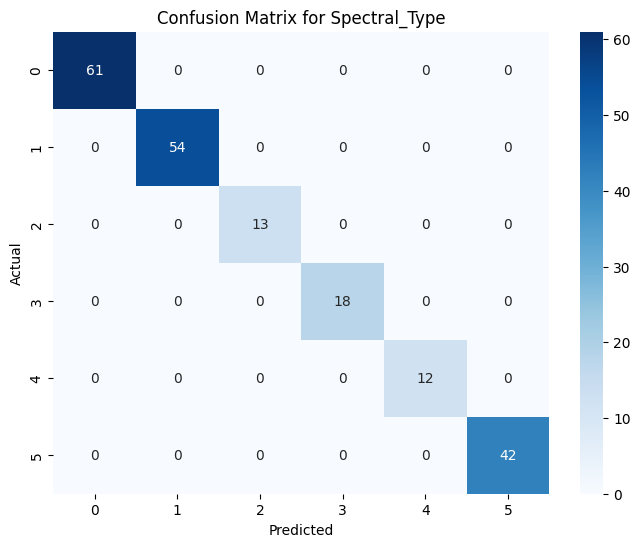

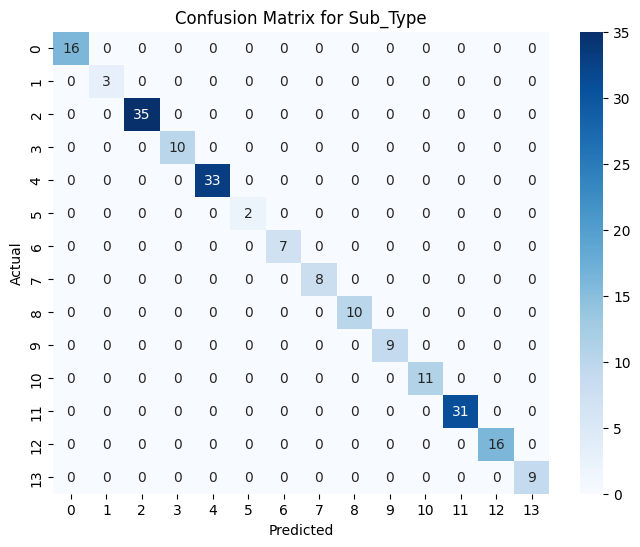

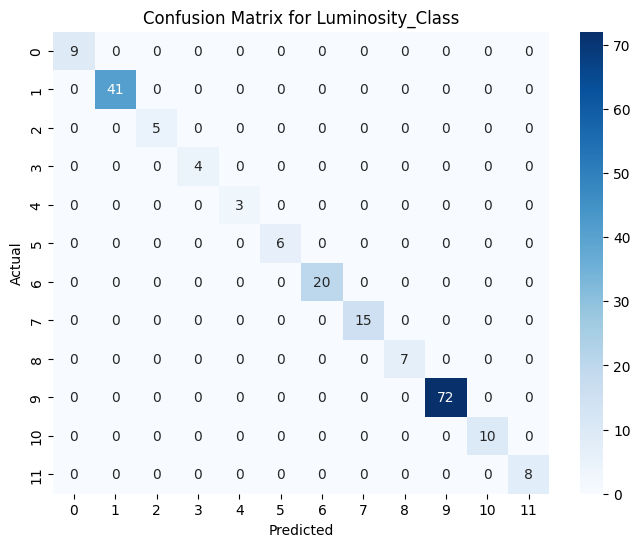

In [16]:
# the model shows the perfect accuracy(f1-score)
# to take a look on the result in detail I use confusuion matrix, which shows, that the trained model perfectly predicted all the 3 parts of Spectral Class
# the perfect clean diagonal in every confusion matrix cell prooves all the cases were classified correctly
# probably happened because of the clear sample devision
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
for i, column in enumerate(['Spectral_Type', 'Sub_Type', 'Luminosity_Class']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test[column], y_pred[:, i]), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {column}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()